# Math of Sobel operator

Saving Picture1.png to Picture1.png


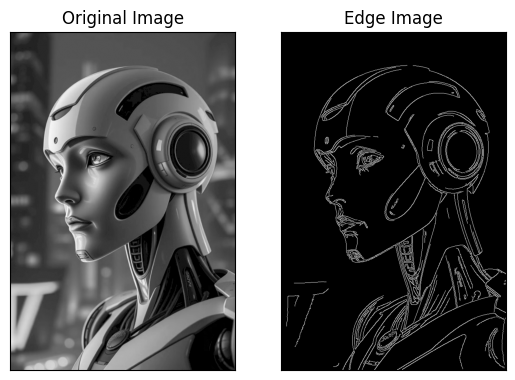

In [ ]:
from google.colab import files
import cv2 as cv
from matplotlib import pyplot as plt

# Upload an image
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Load the uploaded image in grayscale
img = cv.imread(file_name, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read; check the file format or path"

# Apply Canny edge detection
edges = cv.Canny(img, 100, 200)

# Display images
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()



Saving Remove-bg.ai_1736446179151.png to Remove-bg.ai_1736446179151 (3).png


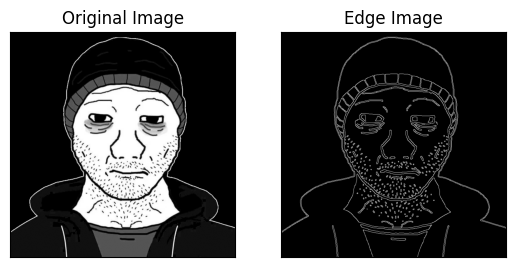

In [ ]:
# https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html
from google.colab import files
import cv2 as cv
from matplotlib import pyplot as plt

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

img = cv.imread(file_name, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read; check the file format or path"

edges = cv.Canny(img, 100, 200)

# Display images
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


# Canny

Saving 73a7836692b7079d755827b9f2deb6f2.jpg to 73a7836692b7079d755827b9f2deb6f2.jpg


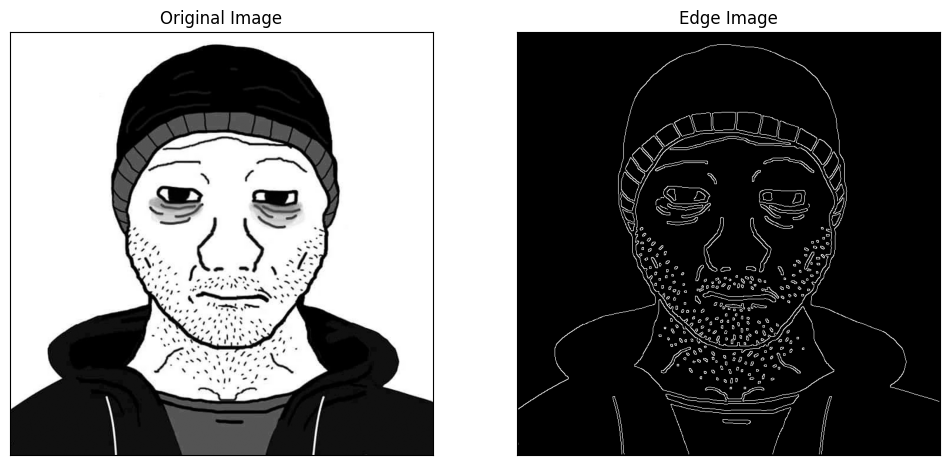

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

def load_image(file_name):
    from PIL import Image
    img = Image.open(file_name).convert('L')  # Convert to grayscale
    return np.array(img, dtype=np.float32)

# Gaussian filter for smoothing
def gaussian_filter(img, kernel_size=5, sigma=1.0):
    ax = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    kernel /= np.sum(kernel)
    return convolve(img, kernel)

# Compute gradients using Sobel operator
def compute_gradients(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    grad_x = convolve(img, sobel_x)
    grad_y = convolve(img, sobel_y)

    magnitude = np.hypot(grad_x, grad_y)  # Gradient magnitude
    direction = np.arctan2(grad_y, grad_x)  # Gradient direction
    return magnitude, direction

# Non-maximum suppression
def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.float32)

    direction = np.rad2deg(direction) % 180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            try:
                q = 255
                r = 255

                # Check the direction and interpolate pixels
                if (0 <= direction[i, j] < 22.5) or (157.5 <= direction[i, j] <= 180):
                    q = magnitude[i, j + 1]
                    r = magnitude[i, j - 1]
                elif (22.5 <= direction[i, j] < 67.5):
                    q = magnitude[i + 1, j - 1]
                    r = magnitude[i - 1, j + 1]
                elif (67.5 <= direction[i, j] < 112.5):
                    q = magnitude[i + 1, j]
                    r = magnitude[i - 1, j]
                elif (112.5 <= direction[i, j] < 157.5):
                    q = magnitude[i - 1, j - 1]
                    r = magnitude[i + 1, j + 1]

                if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                    suppressed[i, j] = magnitude[i, j]
                else:
                    suppressed[i, j] = 0

            except IndexError as e:
                pass

    return suppressed

# Double thresholding
def double_threshold(img, low, high):
    strong = 255
    weak = 75

    strong_edges = (img >= high)
    weak_edges = ((img >= low) & (img < high))

    result = np.zeros_like(img, dtype=np.float32)
    result[strong_edges] = strong
    result[weak_edges] = weak

    return result

# Edge tracking by hysteresis
def edge_tracking_by_hysteresis(img):
    strong = 255
    weak = 75

    rows, cols = img.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if img[i, j] == weak:
                if any(img[i + di, j + dj] == strong for di, dj in [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]):
                    img[i, j] = strong
                else:
                    img[i, j] = 0
    return img

def canny_edge_detection(file_name, low_threshold=50, high_threshold=100):
    img = load_image(file_name)
    smoothed = gaussian_filter(img)
    magnitude, direction = compute_gradients(smoothed)
    suppressed = non_maximum_suppression(magnitude, direction)
    thresholded = double_threshold(suppressed, low_threshold, high_threshold)
    edges = edge_tracking_by_hysteresis(thresholded)
    return img, edges

# Upload and process the image
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

original, edges = canny_edge_detection(file_name)

# Display images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(original, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()


# Sobel

Saving 73a7836692b7079d755827b9f2deb6f2.jpg to 73a7836692b7079d755827b9f2deb6f2.jpg


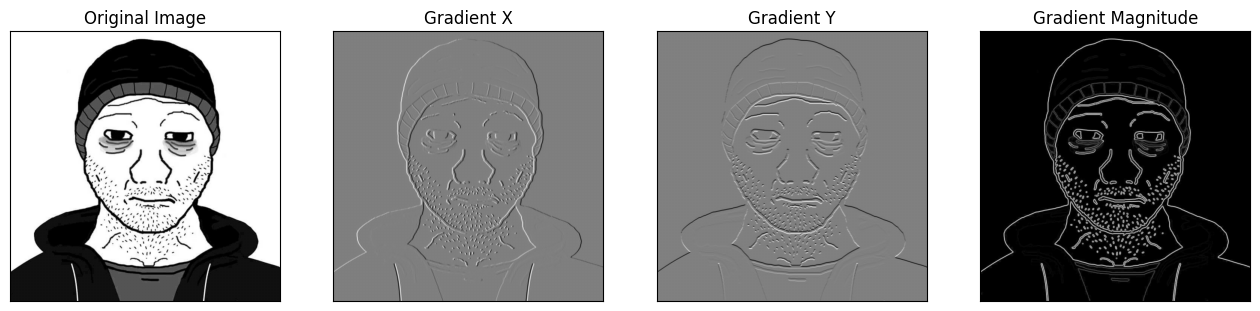

In [ ]:
# https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import convolve

# Load and preprocess the image (grayscale conversion assumed)
def load_image(file_name):
    from PIL import Image
    img = Image.open(file_name).convert('L')  # Convert to grayscale
    return np.array(img, dtype=np.float32)

# Sobel filter for edge detection
def sobel_filter(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)

    grad_x = convolve(img, sobel_x)
    grad_y = convolve(img, sobel_y)

    magnitude = np.hypot(grad_x, grad_y)  # Gradient magnitude
    magnitude = (magnitude / magnitude.max()) * 255  # Normalize to 0-255

    return grad_x, grad_y, magnitude

# Main function
def sobel_edge_detection(file_name):
    img = load_image(file_name)
    grad_x, grad_y, magnitude = sobel_filter(img)
    return img, grad_x, grad_y, magnitude

# Upload and process the image
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

original, grad_x, grad_y, magnitude = sobel_edge_detection(file_name)

# Display images
plt.figure(figsize=(16, 8))
plt.subplot(141), plt.imshow(original, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()


Saving Remove-bg.ai_1736446179151.png to Remove-bg.ai_1736446179151 (5).png


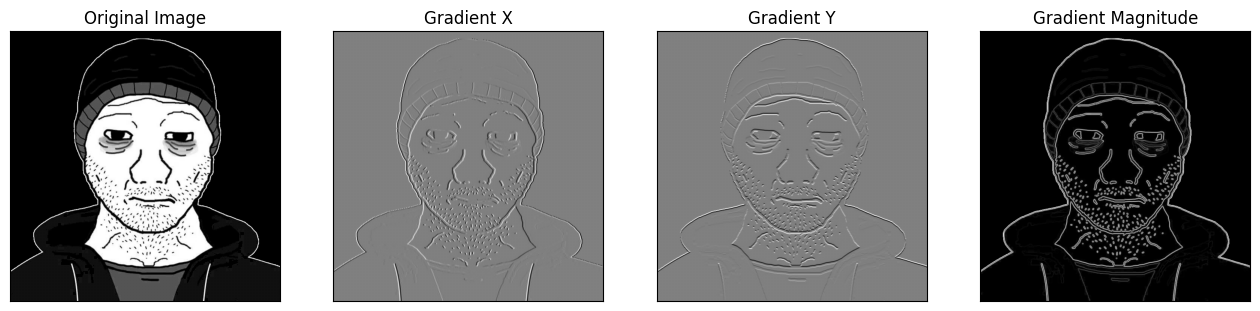

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Sobel filter for edge detection using OpenCV
def sobel_filter_with_opencv(file_name):
    img = cv.imread(file_name, cv.IMREAD_GRAYSCALE)
    assert img is not None, "File could not be read; check the file format or path"

    grad_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
    grad_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

    magnitude = cv.magnitude(grad_x, grad_y)  # Gradient magnitude
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)  # Normalize to 0-255

    return img, grad_x, grad_y, magnitude

# Upload and process the image
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

original, grad_x, grad_y, magnitude = sobel_filter_with_opencv(file_name)

# Display images
plt.figure(figsize=(16, 8))
plt.subplot(141), plt.imshow(original, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X'), plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y'), plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()

Saving image0.jpg to image0.jpg


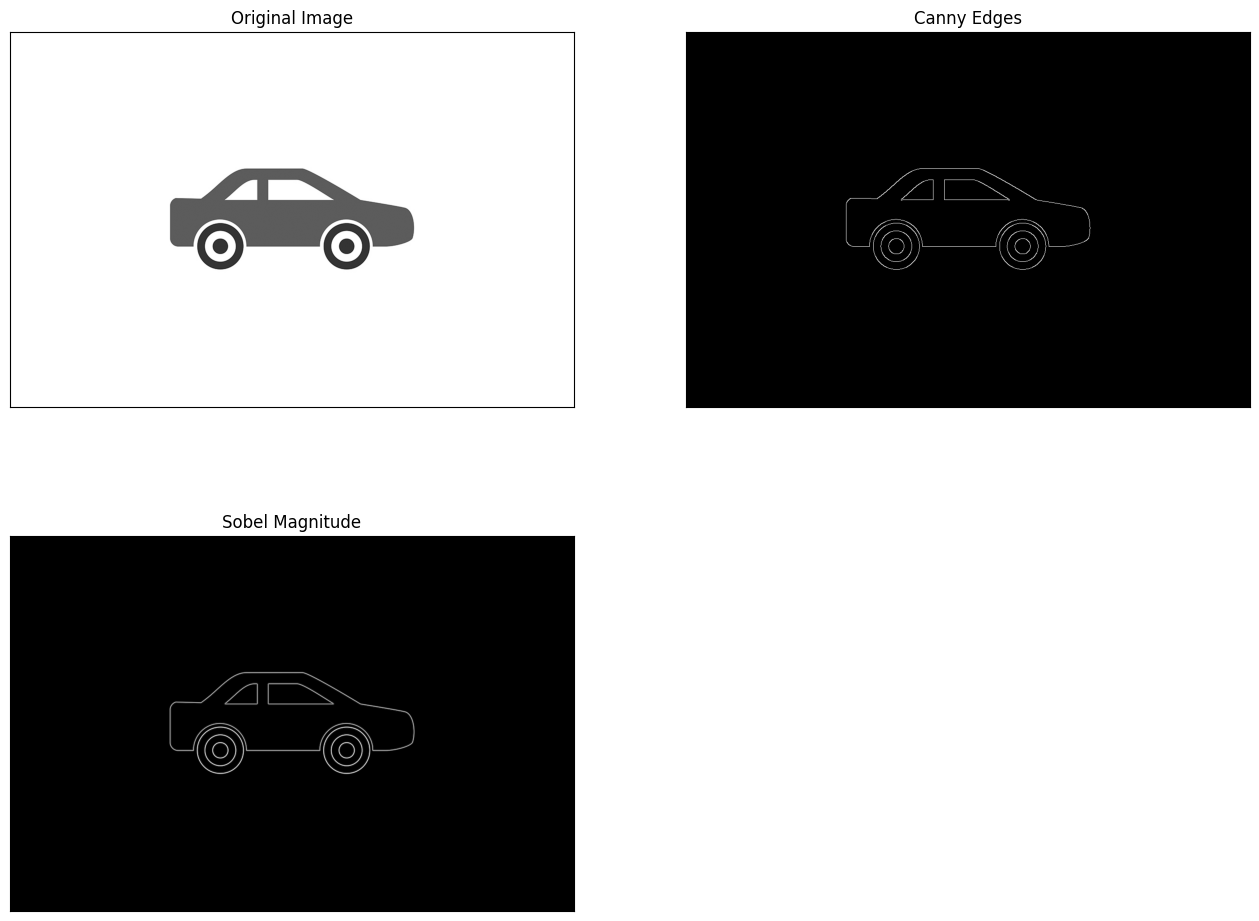

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Sobel filter
def sobel_filter_with_opencv(img):
    grad_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
    grad_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

    magnitude = cv.magnitude(grad_x, grad_y)  # Gradient magnitude
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)  # Normalize to 0-255

    return grad_x, grad_y, magnitude

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

img = cv.imread(file_name, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read; check the file format or path"

# Sobel filter
grad_x, grad_y, sobel_magnitude = sobel_filter_with_opencv(img)

# Canny edge detection
canny_edges = cv.Canny(img, 100, 200)

plt.figure(figsize=(16, 12))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()


Saving image2.jpg to image2.jpg


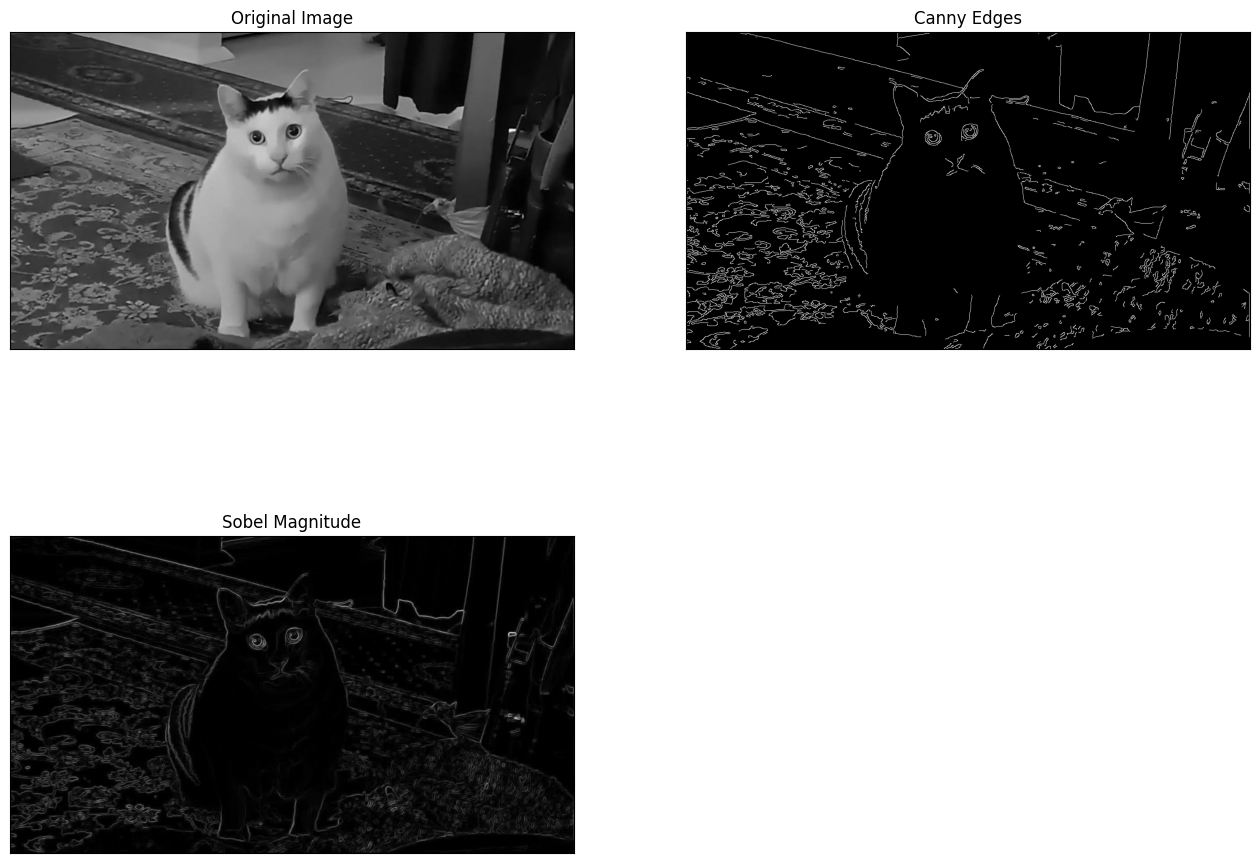

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Sobel filter
def sobel_filter_with_opencv(img):
    grad_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
    grad_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

    magnitude = cv.magnitude(grad_x, grad_y)  # Gradient magnitude
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)  # Normalize to 0-255

    return grad_x, grad_y, magnitude

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

img = cv.imread(file_name, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read; check the file format or path"

# Sobel filter
grad_x, grad_y, sobel_magnitude = sobel_filter_with_opencv(img)

# Canny edge detection
canny_edges = cv.Canny(img, 100, 200)

plt.figure(figsize=(16, 12))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()


Saving image3.jpg to image3.jpg


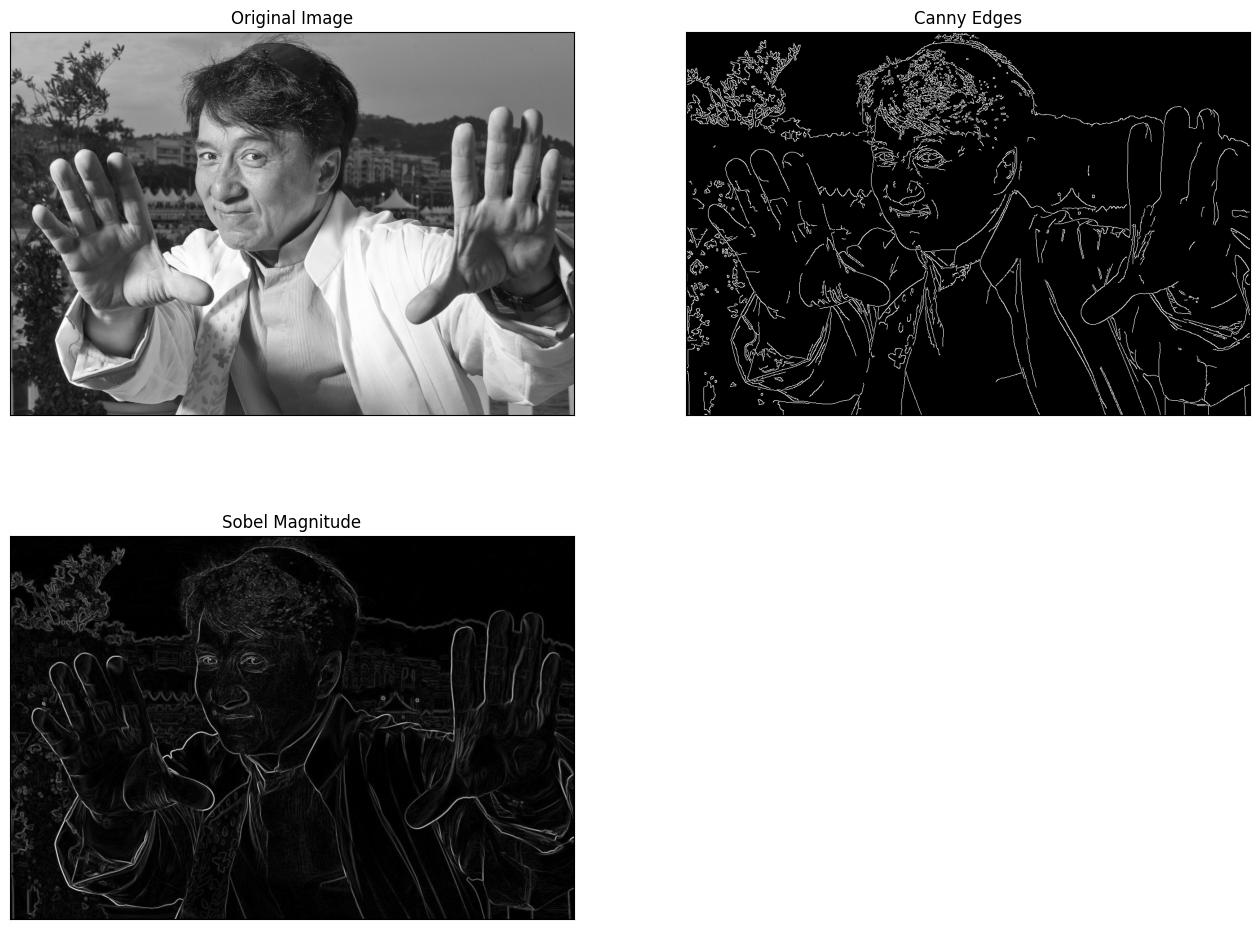

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt

# Sobel filter
def sobel_filter_with_opencv(img):
    grad_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
    grad_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

    magnitude = cv.magnitude(grad_x, grad_y)  # Gradient magnitude
    magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)  # Normalize to 0-255

    return grad_x, grad_y, magnitude

from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

img = cv.imread(file_name, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read; check the file format or path"

# Sobel filter
grad_x, grad_y, sobel_magnitude = sobel_filter_with_opencv(img)

# Canny edge detection
canny_edges = cv.Canny(img, 100, 200)

plt.figure(figsize=(16, 12))
plt.subplot(221), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude'), plt.xticks([]), plt.yticks([])
plt.show()
